## Rasyid Andriansyah 2101963
## UAS Data Mining

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime,date
from time import strptime
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', 500)

# Import warnings filter
from warnings import simplefilter

E:\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Saya memakai dataset naik haji karena menurut saya data tersebut cukup menarik untuk diklasifikasikan

In [2]:
df =pd.read_csv('dataset_uas\jumlah_naik_haji.csv')

# Menampilkan atribut yang terdapat di dalam data frame beserta tipe datanya
print(df.shape)

# Menampilkan data teratas di dalam data frame
print(list(df))




(245, 3)
['prov', 'tahun', 'jumlah_naik_haji']


In [3]:
df.head(10)

,prov,tahun,jumlah_naik_haji
0,ACEH,2016,3135.0
1,SUMATERA UTARA,2016,6529.0
2,SUMATERA BARAT,2016,3576.0
3,RIAU,2016,4032.0
4,JAMBI,2016,2100.0
5,SUMATERA SELATAN,2016,5082.0
6,BENGKULU,2016,1283.0
7,LAMPUNG,2016,5010.0
8,KEP. BANGKA BELITUNG,2016,729.0
9,KEP. RIAU,2016,793.0


In [4]:
df.isnull().sum()

prov                0
tahun               0
jumlah_naik_haji    7
dtype: int64

Terlihat bahwa data masih memiliki nilai NULL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prov              245 non-null    object 
 1   tahun             245 non-null    int64  
 2   jumlah_naik_haji  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


Saya rata-ratakan data null nya karena asumsi saya tiap provinsi punya jatah untuk berangkat haji, jadi tidak mungkin di nol kan

In [6]:
df['jumlah_naik_haji'].fillna(df['jumlah_naik_haji'].median(),inplace=True)

In [7]:
#Mengubah tipe data
df['jumlah_naik_haji'] = df.jumlah_naik_haji.astype(int)
df['prov'] = df.prov.astype("category")
df['tahun'] = df.tahun.astype("category")

Masih Terdapat anomali, yaitu provinsi INDONESIA

In [8]:
df.loc[(df.prov == "INDONESIA")]

,prov,tahun,jumlah_naik_haji
34,INDONESIA,2016,154441
69,INDONESIA,2015,154455
104,INDONESIA,2014,154467
139,INDONESIA,2013,154546
174,INDONESIA,2012,192291
209,INDONESIA,2011,199849
244,INDONESIA,2010,196206


Kita drop Provinsi INDONESIA

In [9]:
# drop provinsi indonesia
df = df.drop(labels=[34,69, 104, 139, 174, 209, 244], axis=0)

# EDA

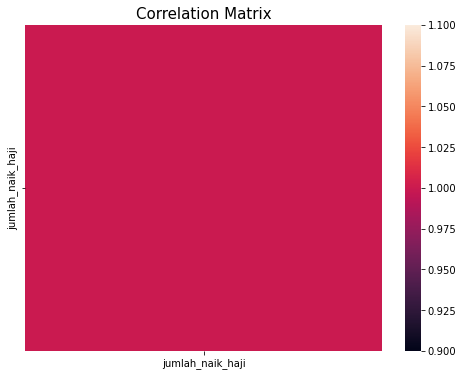

In [10]:
# Melihat korelasi dari matrix
plt.figure(figsize=(8,6))
corr=df.corr()
plt.title("Correlation Matrix",fontsize="15")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);



Dapat kita lihat bahwa korelasi antara jumlah naik haji dengan tahun memiliki korelasi yang cukup berpengaruh satu sama lain

<AxesSubplot:title={'center':'Rata-rata jumlah naik haji per provinsi '}, xlabel='prov'>

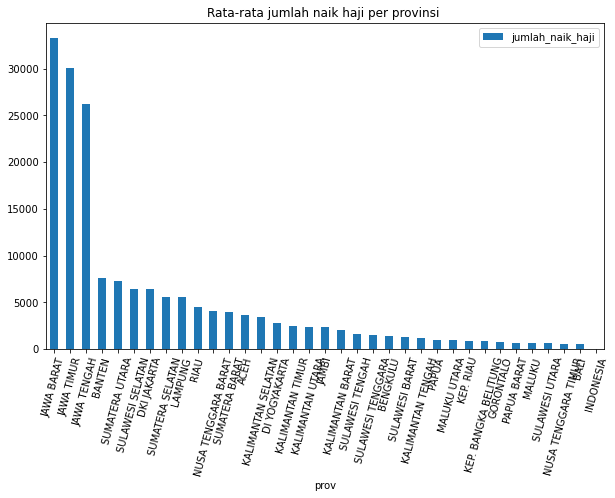

In [11]:
# Melihat rata-rata pengeluaran dari berbagai kota yang berbeda
df[['prov','jumlah_naik_haji']].groupby('prov').mean().sort_values(by='jumlah_naik_haji', ascending=False).plot.bar(figsize=(10,6), rot=75, title='Rata-rata jumlah naik haji per provinsi ')

### Dari Plot tersebut kita lihat bahwa provinsi jawa barat memiliki rerata paling tinggi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'ACEH'),
  Text(1, 0, 'BALI'),
  Text(2, 0, 'BANTEN'),
  Text(3, 0, 'BENGKULU'),
  Text(4, 0, 'DI YOGYAKARTA'),
  Text(5, 0, 'DKI JAKARTA'),
  Text(6, 0, 'GORONTALO'),
  Text(7, 0, 'INDONESIA'),
  Text(8, 0, 'JAMBI'),
  Text(9, 0, 'JAWA BARAT'),
  Text(10, 0, 'JAWA TENGAH'),
  Text(11, 0, 'JAWA TIMUR'),
  Text(12, 0, 'KALIMANTAN BARAT'),
  Text(13, 0, 'KALIMANTAN SELATAN'),
  Text(14, 0, 'KALIMANTAN TENGAH'),
  Text(15, 0, 'KALIMANTAN TIMUR'),
  Text(16, 0, 'KALIMANTAN UTARA'),
  Text(17, 0, 'KEP. BANGKA BELITUNG'),
  Text(18, 0, 'KEP. RIAU'),
  Text(19, 0, 'LAMPUNG'),
  Text(20, 0, 'MALUKU'),
  Text(21, 0, 'MALUKU UTARA'),
  Text(22, 0, 'NUSA TENGGARA BARAT'),
  Text(23, 0, 'NUSA TENGGARA TIMUR'),
  Text(24, 0, 'PAPUA'),
  Text(25, 0, 'PAPUA BARAT'),
  Text(26, 0, 'RIAU'),
  Text(27, 0, 'SULAWESI BARAT'),
  T

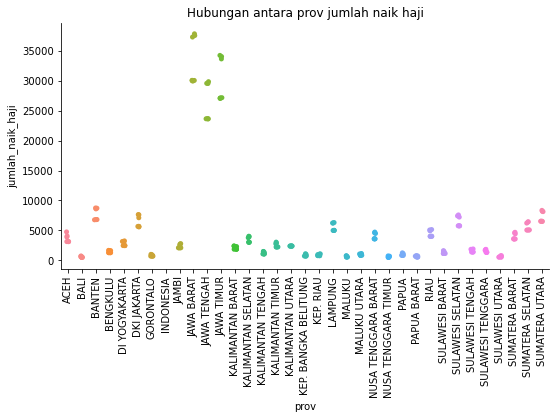

In [12]:
c = sns.catplot(x="prov", y="jumlah_naik_haji", data=df).set(title="Hubungan antara prov jumlah naik haji")
c.fig.set_size_inches(10,4)
plt.xticks(rotation=90)


## hubungan yang paling tinggi adalah provinsi jawa barat

In [13]:
df2 =pd.read_csv('dataset_uas\pmi.csv')

# Menampilkan atribut yang terdapat di dalam data frame beserta tipe datanya
print(df2.shape)

# Menampilkan data teratas di dalam data frame
print(list(df2))

(442, 3)
['prov', 'tahun', 'kategori_pmi']


### Merge

In [14]:
df_merge = pd.merge(df, df2, how='left',on=["prov", "tahun"])
df_merge.head(5)

,prov,tahun,jumlah_naik_haji,kategori_pmi
0,ACEH,2016,3135,TINGGI
1,SUMATERA UTARA,2016,6529,TINGGI
2,SUMATERA BARAT,2016,3576,TINGGI
3,RIAU,2016,4032,TINGGI
4,JAMBI,2016,2100,SEDANG


## One hot Encoding

In [15]:
# Proses One Hot Encoding untuk atribut color, salutation, state, dan day_of_week
df_merge = pd.get_dummies(data=df_merge, columns=['prov','tahun'])

df.head()


,prov,tahun,jumlah_naik_haji
0,ACEH,2016,3135
1,SUMATERA UTARA,2016,6529
2,SUMATERA BARAT,2016,3576
3,RIAU,2016,4032
4,JAMBI,2016,2100


In [16]:
#menyiapkan data train dan test, cara pertama adalah dengan teknik hold out. 
from sklearn.model_selection import train_test_split

X = df_merge.drop(['kategori_pmi'],axis=1) #training features

Y = df_merge['kategori_pmi'] # target variable
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=123)

# Menyimpan nama kolom untuk keperluan prediksi nanti
import pickle
with open('x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [17]:
##Pembentukan model random forest
clf =RandomForestClassifier(random_state=1,n_estimators=200,class_weight='balanced',
                    min_samples_leaf=5,
                       min_samples_split=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))





Akurasi 0.625
               precision    recall  f1-score   support

SANGAT RENDAH       0.00      0.00      0.00         2
       SEDANG       0.88      0.70      0.78        40
       TINGGI       0.20      0.33      0.25         6

     accuracy                           0.62        48
    macro avg       0.36      0.34      0.34        48
 weighted avg       0.75      0.62      0.68        48

